In [1]:
import pandas as pd

df=pd.read_csv("train-HR.csv")
df.index = df.EmployeeNumber
df.head()
print("Shape: ", df.shape)
#df.columns

Shape:  (1322, 32)


In [2]:
predictor = df[['Age', 'Gender', 'Department', 'JobRole', 'JobLevel',
       'JobSatisfaction', 'JobInvolvement', 'PerformanceRating', 'OverTime',
       'EnvironmentSatisfaction', 'EducationField', 'Education',
       'BusinessTravel', 'WorkLifeBalance', 'MaritalStatus',
       'RelationshipSatisfaction', 'DistanceFromHome', 'StockOptionLevel',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike']]

target = df['Attrition']


In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(predictor, target,test_size=0.2,random_state=0)
print("Shape of training data: ",train_x.shape)
print("Shape of test data: ",train_y.shape)

Shape of training data:  (1057, 30)
Shape of test data:  (1057,)


In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [5]:
logModel = LogisticRegression()

In [6]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [7]:
clf_trial = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [8]:
best_clf_trial = clf_trial.fit(train_x,train_y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2656 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3586 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4575 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4785 out of 4800 | elapsed:  6.3min remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.3min finished


In [12]:
print("Best model paramaters: ",best_clf_trial.best_estimator_)
print (f'Accuracy - : {best_clf_trial.score(train_x,train_y):.3f}')

Best model paramaters:  LogisticRegression(C=10000.0, solver='liblinear')
Accuracy - : 0.885


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

clf = Pipeline(steps=[('scalar', StandardScaler()),
                      ('classifier', LogisticRegression(C=10000.0, solver='liblinear'))])
clf.fit(train_x,train_y)
predictions = clf.predict(train_x)
predict_test  = clf.predict(test_x)

print('RMSE on train data: ')
print(np.sqrt(np.mean(predictions- train_y)**2))
print('RMSE on test data: ')
print(np.sqrt(np.mean(predict_test- test_y)**2))


RMSE on train data: 
0.07190160832544938
RMSE on test data: 
0.09056603773584905


In [19]:
# Finding most influencing variables:

m = LogisticRegression(C=10000.0, solver='liblinear')
m.fit(train_x, train_y)

print(m.coef_)
# print(np.std(train_x, 0)*m.coef_)

m.fit(train_x / np.std(train_x, 0), train_y)
print(m.coef_)

[[-2.33338009e-02  2.36876605e-01  5.66936545e-01 -5.31121882e-02
   3.28839029e-02 -3.47904943e-01 -5.31524076e-01  3.19294233e-01
   1.55198432e+00 -2.85386155e-01  6.20694546e-02  7.86167004e-02
   8.30061042e-01 -3.46187951e-01  5.10862616e-01 -2.01588407e-01
   3.63257537e-02 -1.98566504e-01  1.34625580e-01 -7.24157346e-02
  -1.49476204e-01  7.10253735e-02 -1.09536259e-01  1.22237078e-01
  -8.64593370e-02 -3.50542933e-04  1.23521523e-03 -1.18033986e-04
   4.01417249e-06 -2.00203448e-02]]
[[-0.26908759  0.15084562  0.48145647 -0.24631719 -0.1337655  -0.41905736
  -0.40644009  0.15895013  0.81285885 -0.34838534  0.0759424   0.10881625
   0.44991317 -0.27690452  0.39844365 -0.24806362  0.31716155 -0.2473528
   0.36088065 -0.55912671 -0.19623615  0.49392128 -0.50172964  0.5140954
  -0.37798713 -0.15651698  0.01514473 -0.49879237  0.01495532 -0.15263319]]


In [20]:
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predict_test, test_y)
cf_matrix

array([[221,  26],
       [  2,  16]], dtype=int64)

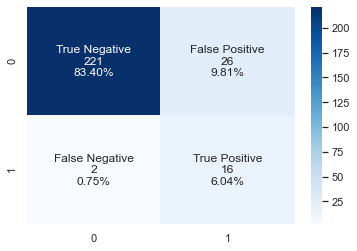

In [22]:
import seaborn as sns
sns.set()

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [23]:
# For the training model

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_y, predict_test))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_y, predict_test, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_y, predict_test, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_y, predict_test, average=None)[0])

Accuracy:  0.8943396226415095
Recall:  0.9910313901345291
Precision:  0.8947368421052632
F1 score:  0.9404255319148936


### Implementing for test data and verifying values:

In [ ]:
test_df=pd.read_csv("test-HR.csv")
test_df.index = test_df.EmployeeNumber
print("Shape",test_df.shape)
test_df.head()

test_predictor = test_df.drop(['EmployeeNumber','Attrition'],1)
test_target = test_df.Attrition
test_predictor

In [ ]:
y_predict = clf.predict(test_predictor)

In [ ]:
print('RMSE on train data: ')
print(np.sqrt(np.mean(y_predict- test_target)**2))


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
test_matrix = confusion_matrix(test_target, y_predict)
test_matrix

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_matrix.flatten()/np.sum(test_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_target, y_predict))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_target, y_predict, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_target, y_predict, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_target, y_predict, average=None)[0])

### Find importance of features:

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

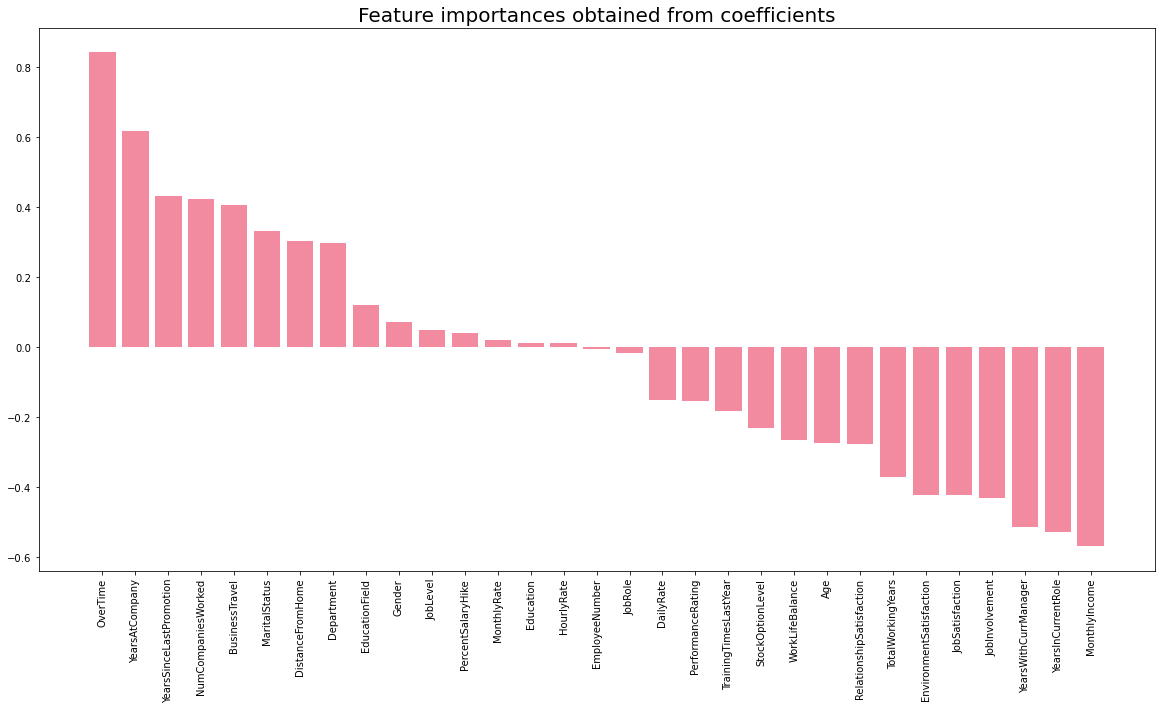

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#F38BA0')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()